In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [132]:
df = pd.read_json('data\original_pulsars.json', dtype={"psr": int, 
                                                       "period": str, 
                                                       "period-base-10": int, 
                                                       "period-seconds": float, 
                                                       "angle": int, 
                                                       "distance": int, 
                                                       "implied-distance-parsecs": int})

df = df.set_index('psr')

df.angle = np.deg2rad(df.angle.values)
df.loc[:, 'period'] = [np.base_repr(n, 2) for n in df['period-base-10'].values]

df.head()

,period,period-base-10,period-seconds,angle,distance,implied-distance-parsecs
psr,,,,,,
1,1000110001111100100011011101010,1178486506,0.829683,0.296706,27,2300
2,10110010011000101011101101111,374101871,0.263377,0.855211,2,160
3,100000110110010110001001111000,551117432,0.388000,1.012291,56,4700
4,111100011011011001010100111,126726823,0.089219,1.658063,15,1300
5,10101011011001101100101000011,359455043,0.253065,2.251475,1,120


In [127]:
testing = pd.DataFrame({'angle': [0.1 * np.pi * n for n in range(20)],
                        'distance': [80]*20,
                        'period': ['10'*40]*20})
testing.head()

,angle,distance,period
0,0.000000,80,1010101010101010101010101010101010101010101010...
1,0.314159,80,1010101010101010101010101010101010101010101010...
2,0.628319,80,1010101010101010101010101010101010101010101010...
3,0.942478,80,1010101010101010101010101010101010101010101010...
4,1.256637,80,1010101010101010101010101010101010101010101010...


In [133]:
rem = 3

kwargs = {'ha': 'left',
          'va': 'center_baseline',
          'rotation': 90,
          'rotation_mode': 'anchor',
          'transform_rotates_text': True,
          'fontsize': rem,
          'fontweight': 'black',
          'horizontalalignment': 'right',
          'verticalalignment': 'center_baseline'
          }

In [200]:
def plot_axial(df, rem=1, dpi=200):
    data = df.copy()
    fig, ax = plt.subplots(figsize=(10, 10),
                        subplot_kw={'projection': 'polar'}
                        )

    fig.set_dpi(dpi)
    ax.set_axis_off()

    linewidth = 2.5E-1 * rem
    delta_d = 2.5E-1 * rem
    delta_a = 5E-4 * np.pi * rem
    
    max_line = data.distance.max() * 1.5
    
    plt.plot([0, 0], 
             [0, max_line], 
             c='k', 
             linewidth = linewidth)
    plt.plot([0 - delta_a, 0 + delta_a], 
             [max_line, max_line], 
             c='k', 
             linewidth = linewidth)

    for _, row in data.iterrows():  
        angle, distance = row.angle, row.distance
        plt.plot([0, angle], 
                 [0, distance], 
                 c='k', 
                 linewidth = linewidth)
        
        distance_d = delta_d
        for point in row.period:
            point_angle = delta_a * max_line / (distance + distance_d)
            
            if point == '1':
                plt.plot([angle - point_angle, angle + point_angle], 
                         [distance + distance_d, distance + distance_d], 
                         c='k', 
                         linewidth = linewidth)
            elif point == '0':
                plt.plot([angle, angle], 
                         [distance + distance_d, distance + distance_d + delta_d], 
                         c='k', 
                         linewidth = linewidth)
                distance_d += delta_d
            
            distance_d += delta_d
    plt.tight_layout()
    plt.show()

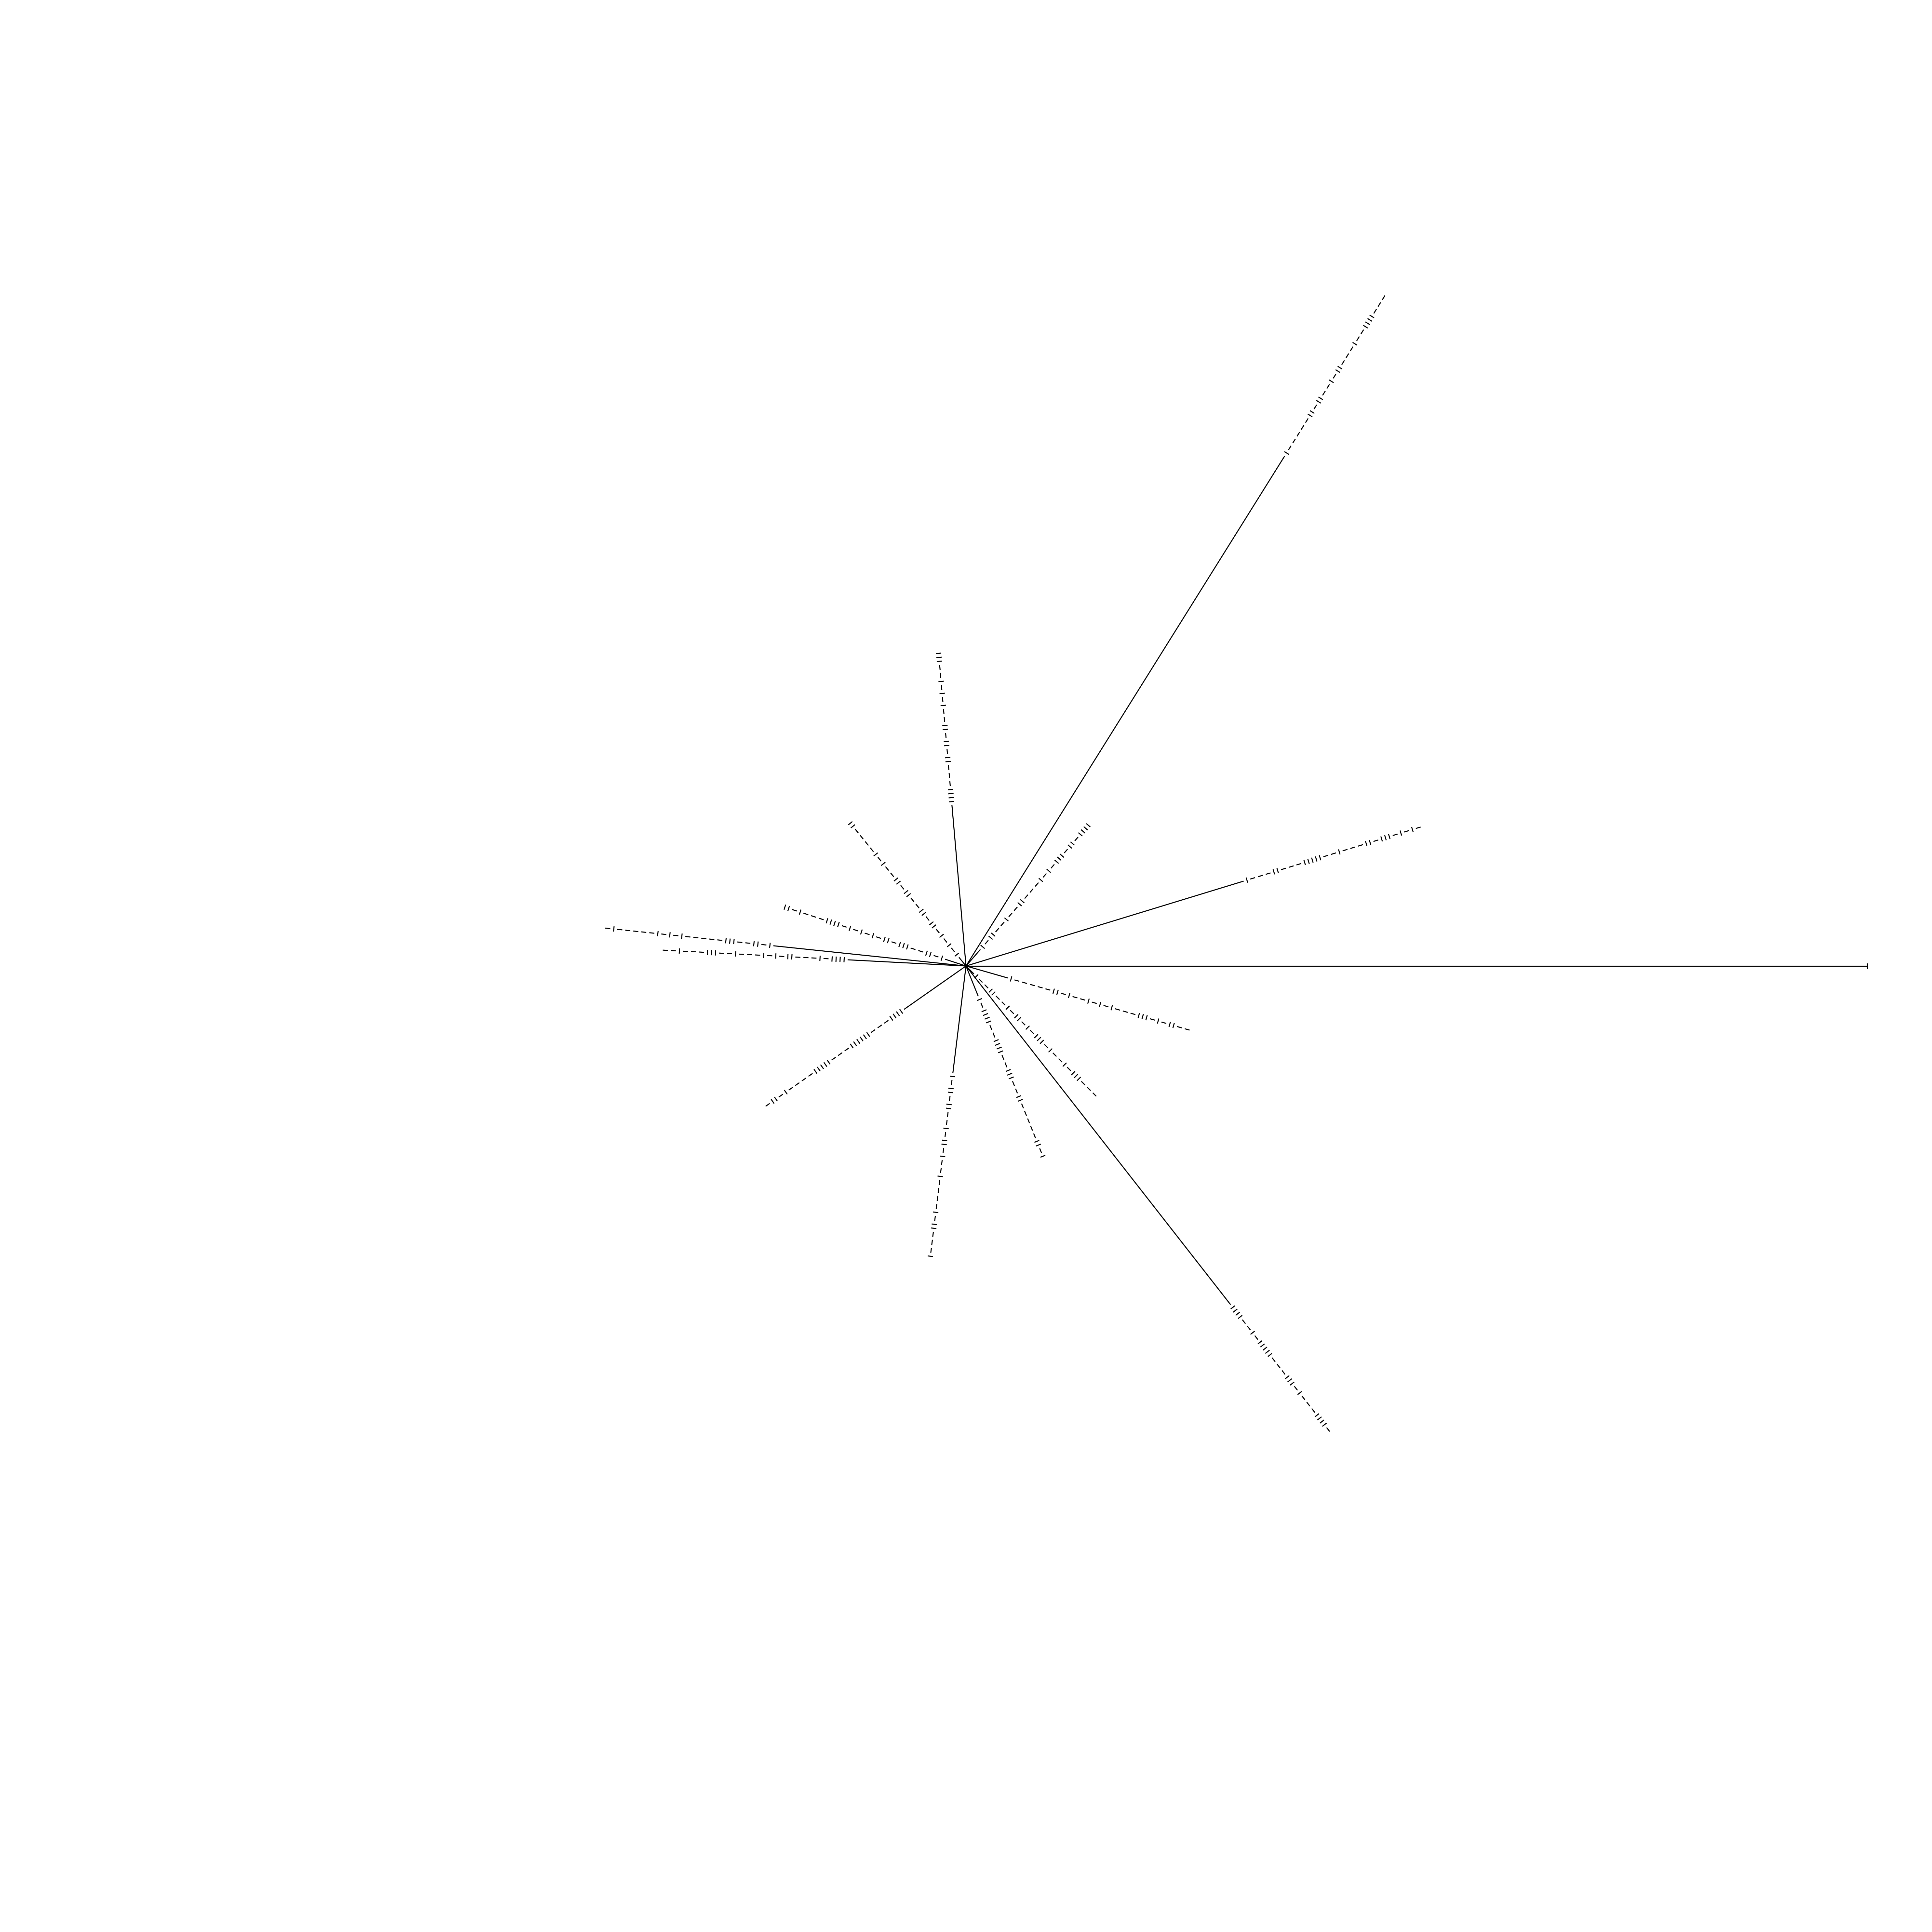

In [201]:
plot_axial(df, 1.5, 600)

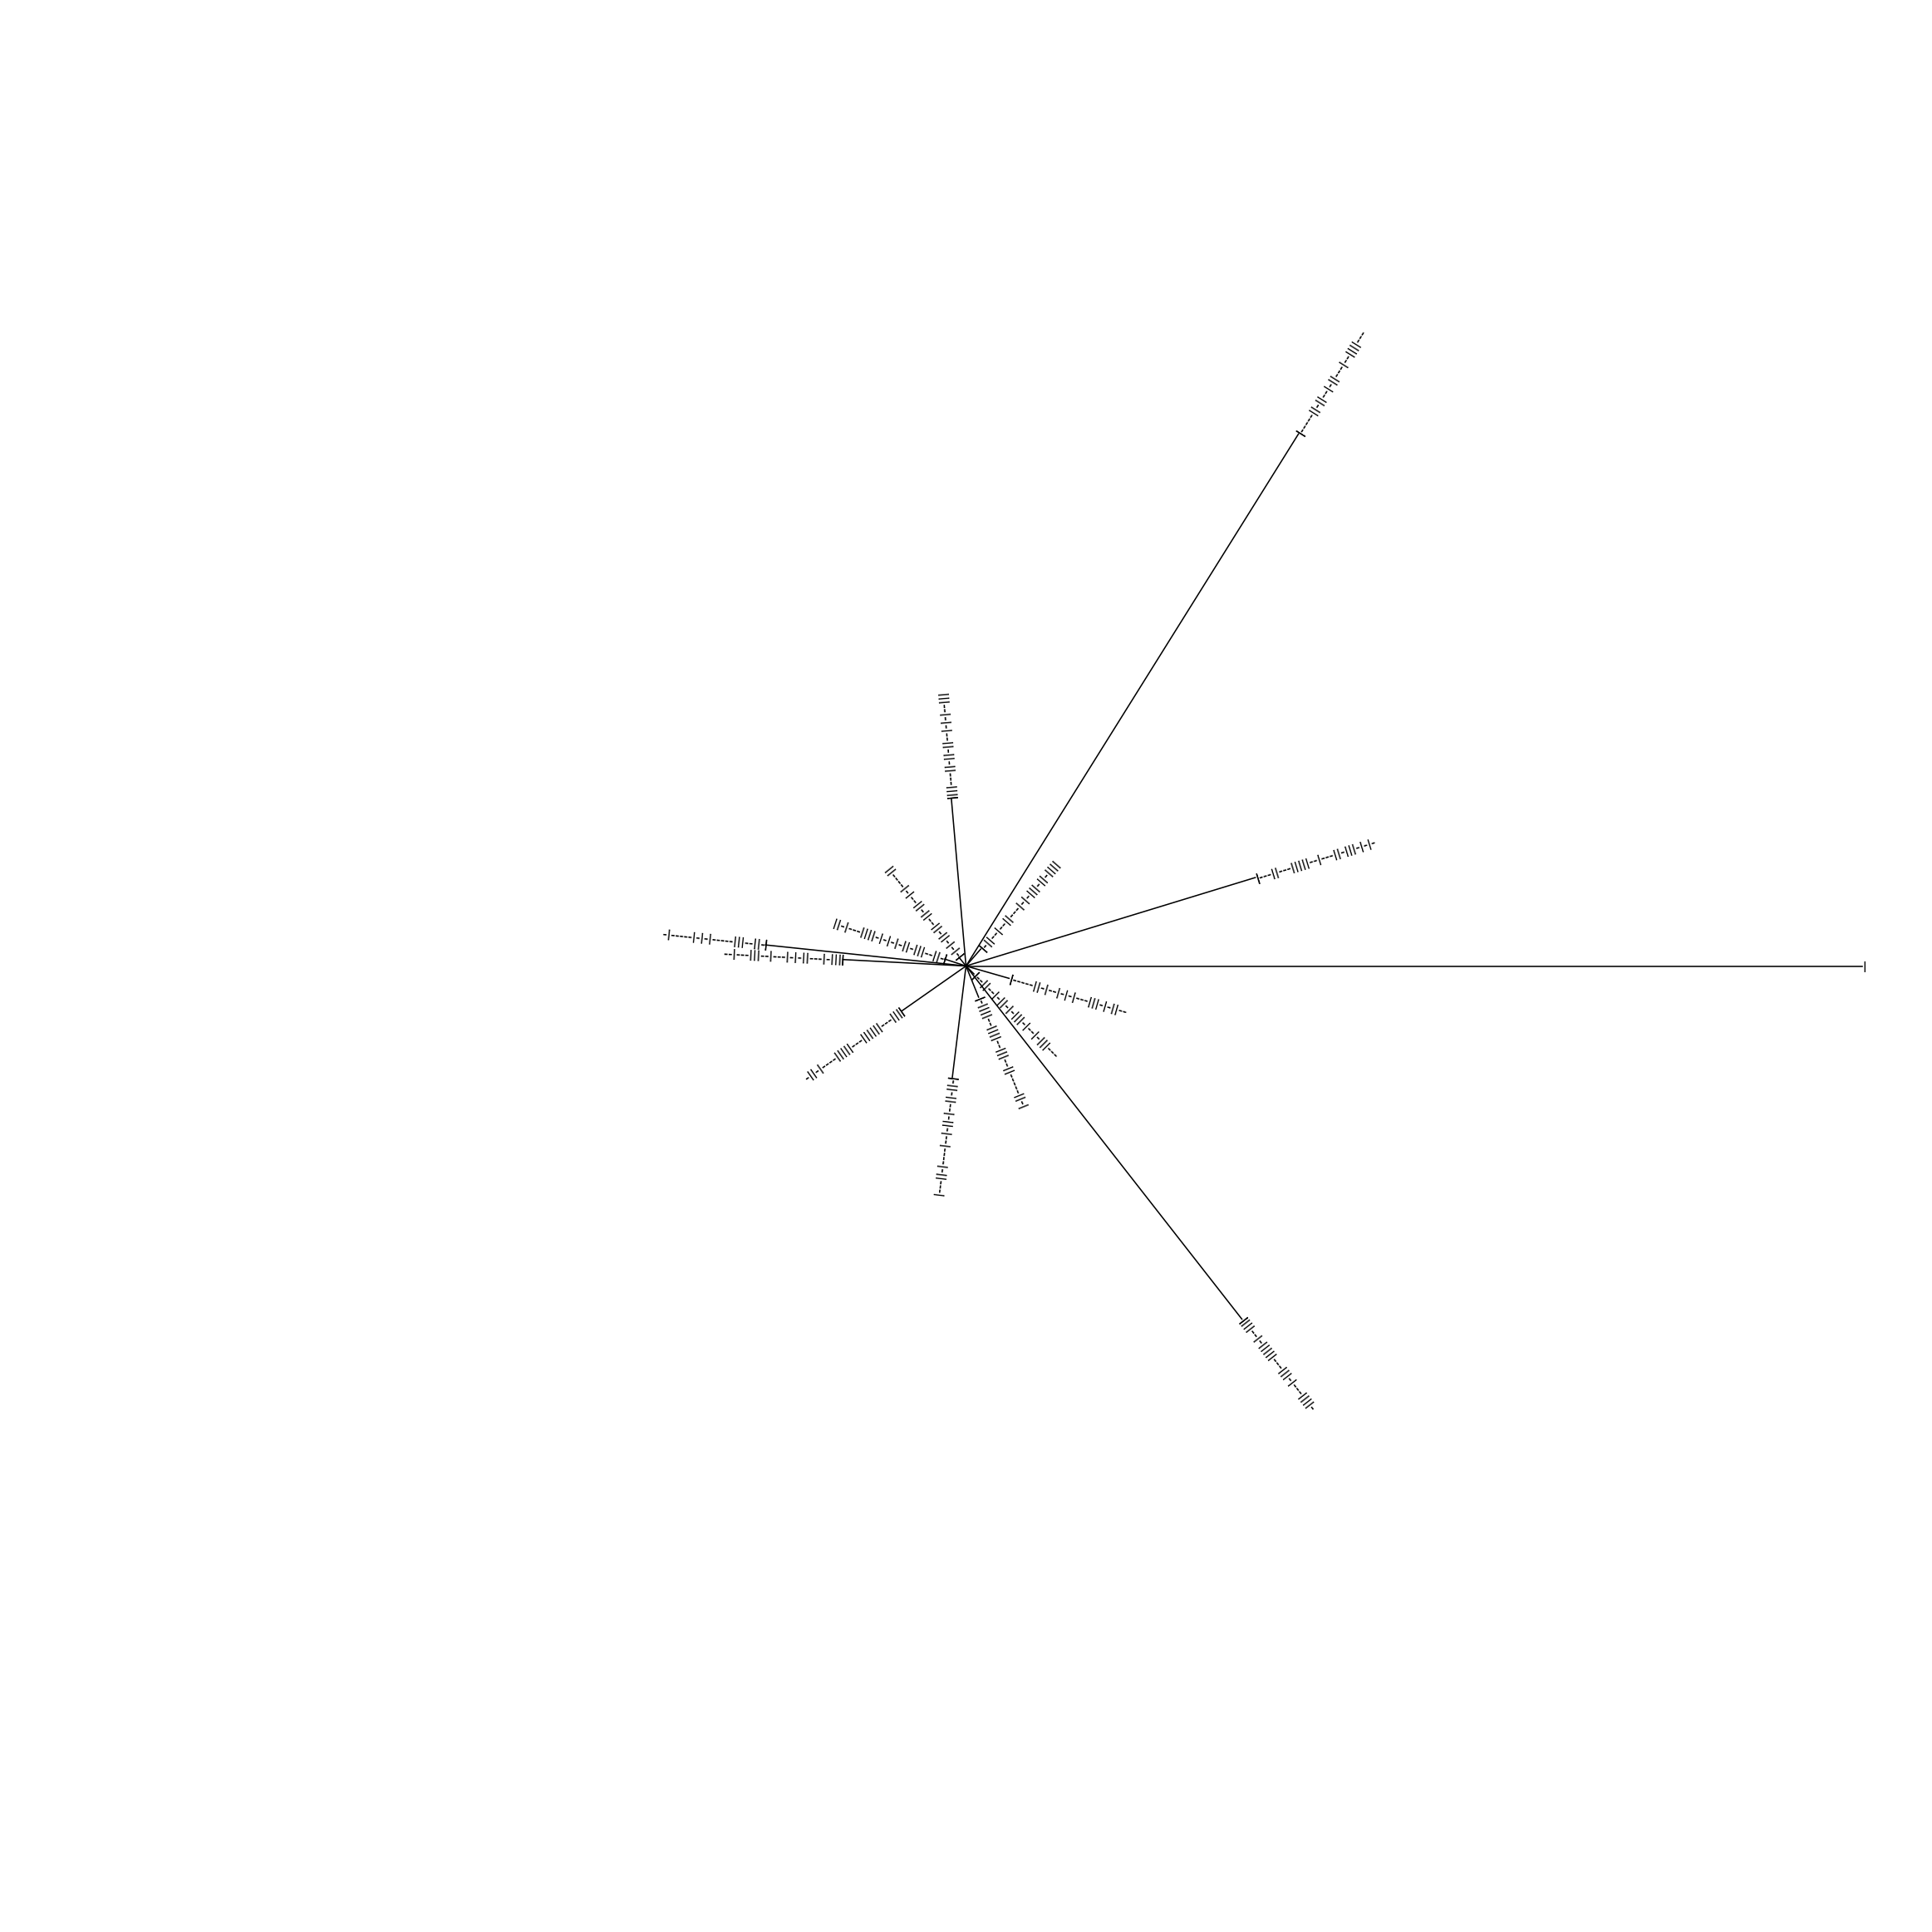

In [64]:
BINARY_1 = '|'
BINARY_0 = '-'


fig, ax = plt.subplots(figsize=(10, 10),
                       subplot_kw={'projection': 'polar'}
                       )

fig.set_dpi(300)
ax.set_axis_off()

plt.plot([0, 0], [0, 80], c='k', linewidth=.125*rem)
plt.text(0, 80, BINARY_1, **kwargs)

for _, row in df.iterrows():
    angle, distance = row.angle, row.distance
    plt.text(angle, distance, BINARY_1, **kwargs)
    
    period = row.period.replace('0', BINARY_0).replace('1', BINARY_1)
    
    delta_d = .25*rem
    delta_a = .5*rem
    
    plt.plot([0, angle], [0, distance], c='k', linewidth=.125*rem)
    
    plt.text(angle, distance, period, **kwargs)
    

    
plt.show()